In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import matplotlib.gridspec as gridspec
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm
from sklearn import mixture

In [31]:
df = pd.read_csv("C:/Users/galax/Downloads/insurance.csv")

print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


C:\Users\galax\AppData\Local\Temp\ipykernel_14544\579679181.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat], bins=30)
C:\Users\galax\AppData\Local\Temp\ipykernel_14544\579679181.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat], bins=30)


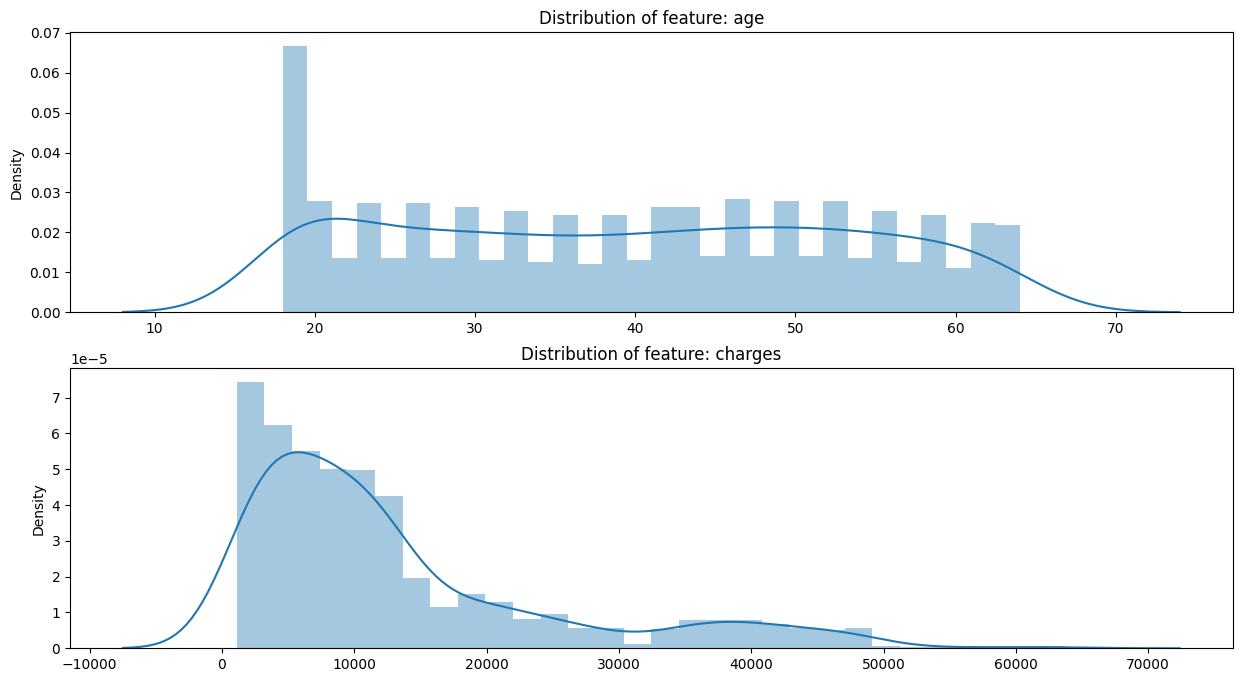

In [32]:

features=['age', 'charges']
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(df[feat], bins=30)
    
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

In [33]:
newdf = df[['age','charges']]
newdf.head()

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520


After Scaling

In [34]:
df_ = newdf
df_.head()

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520


C:\Users\galax\AppData\Local\Temp\ipykernel_14544\1680862942.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_[feat], bins=30)
C:\Users\galax\AppData\Local\Temp\ipykernel_14544\1680862942.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_[feat], bins=30)


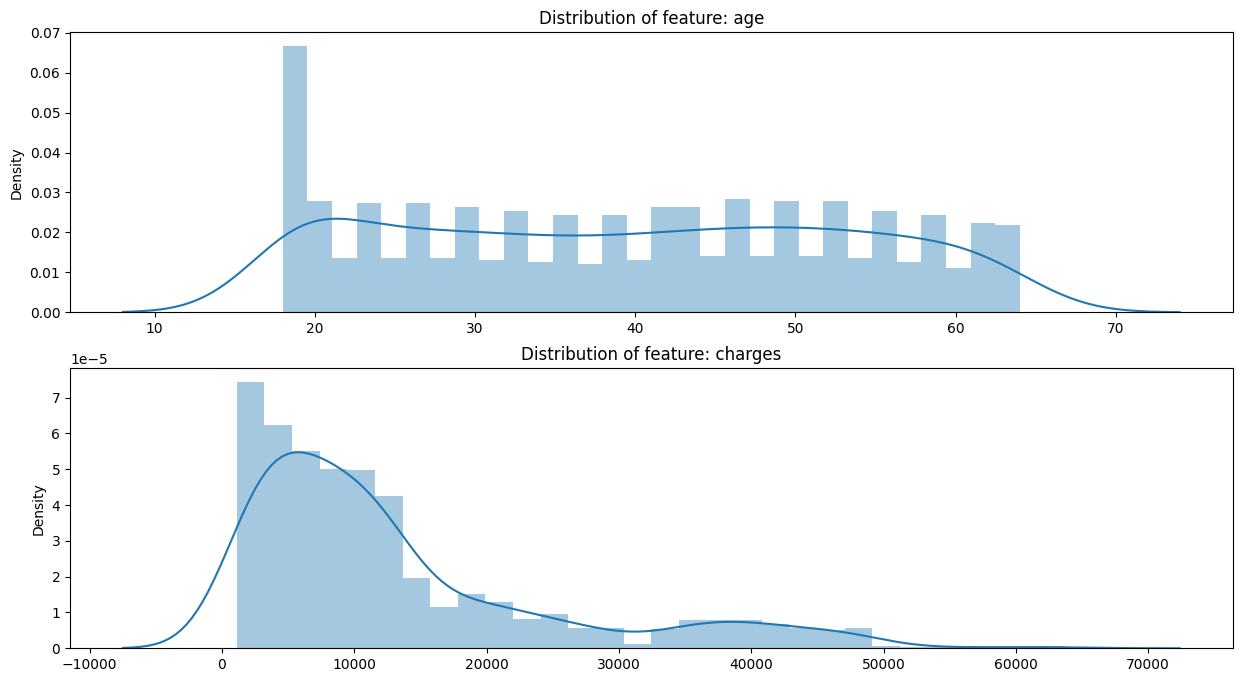

In [35]:
features=['age', 'charges']
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(df_[feat], bins=30)
    
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

<Axes: xlabel='age', ylabel='charges'>

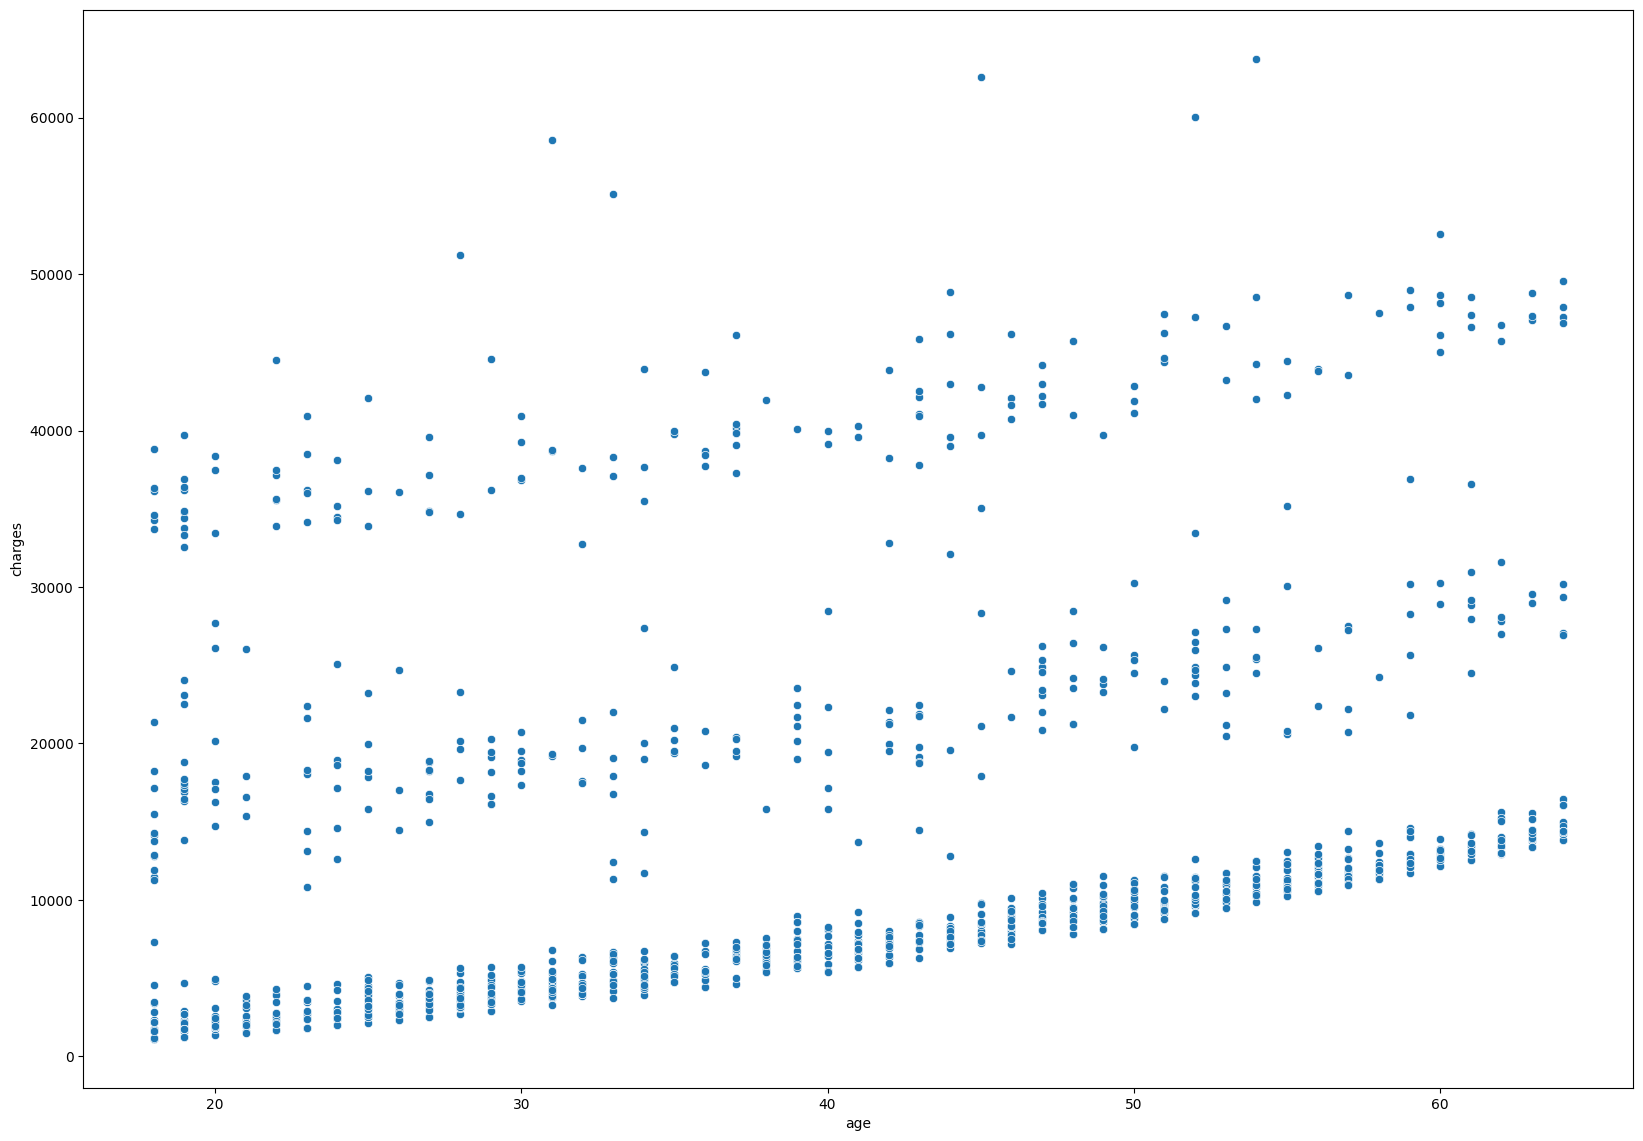

In [36]:
plt.figure(figsize=(20,14))
sns.scatterplot(x = df_['age'],y = df_['charges'])

In [37]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV


def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(df_)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['full'],
                         'n_components': range(1, 7)},
             scoring=<function gmm_bic_score at 0x000001F725946340>)

In [38]:
df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
3,4,full,7242.711377
4,5,full,7271.238662
2,3,full,7271.887454
1,2,full,7282.062112
5,6,full,7289.378428


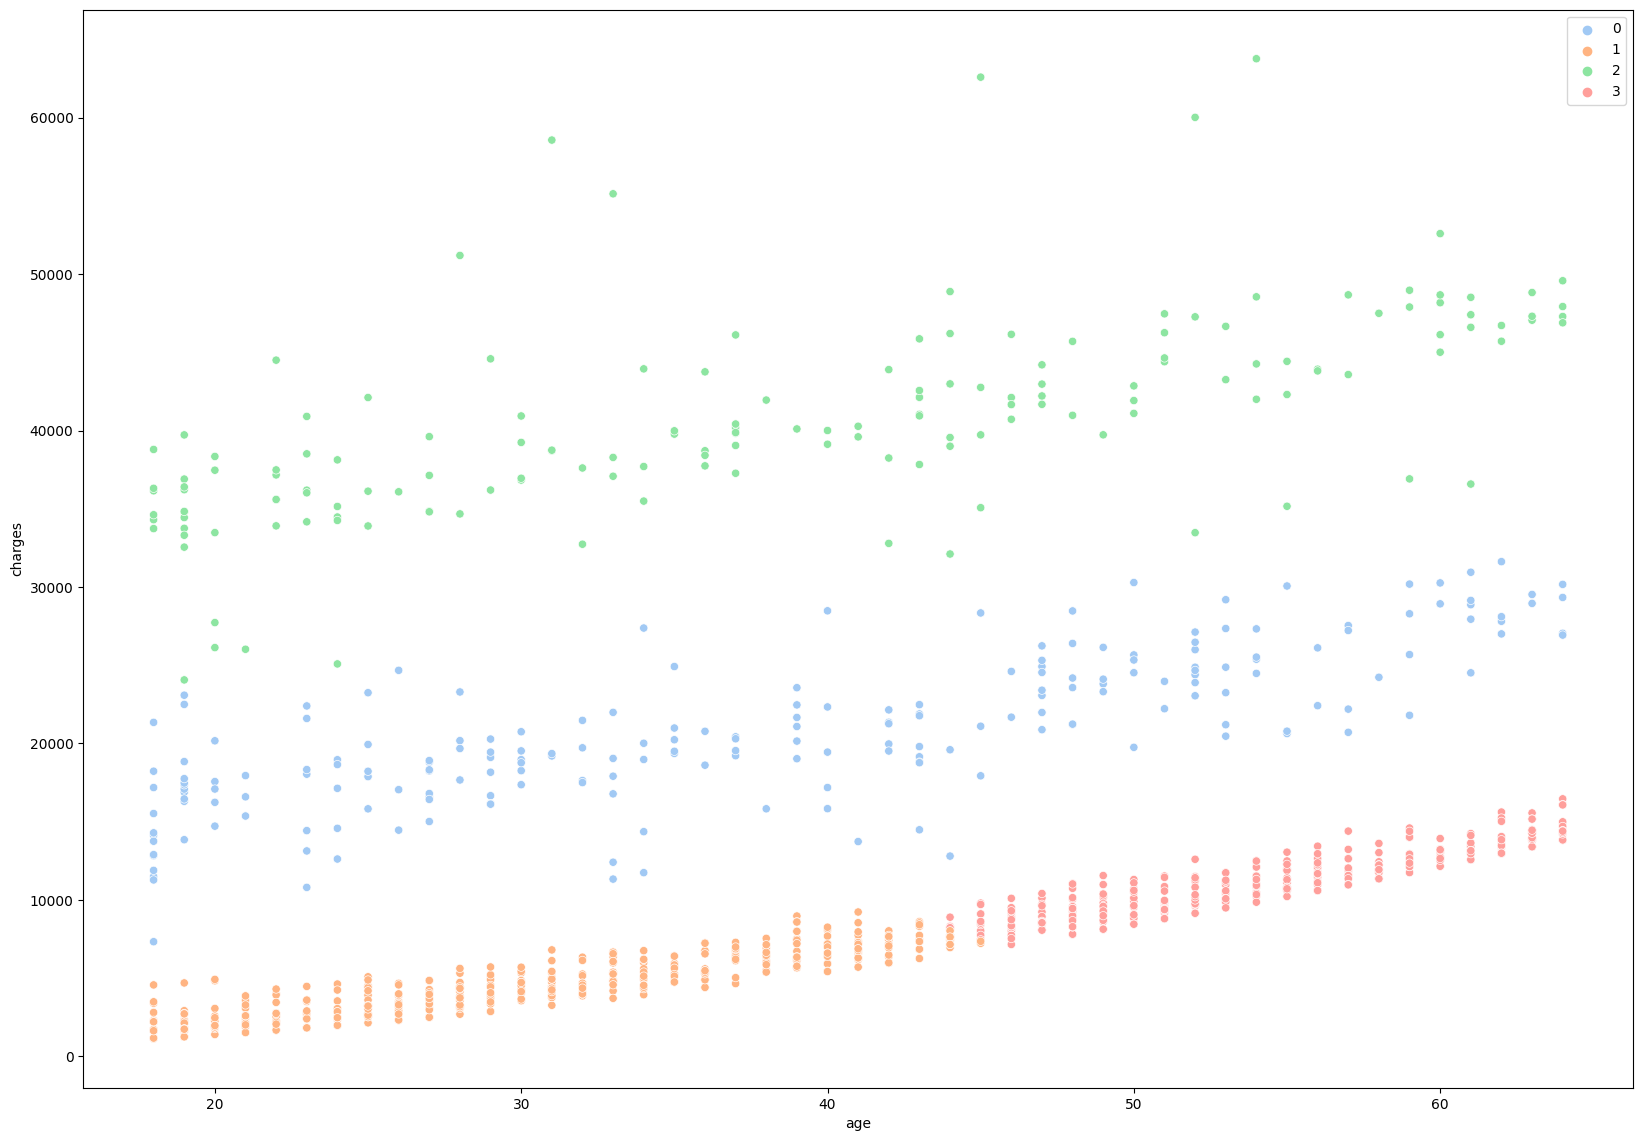

In [39]:
gm =GaussianMixture(n_components=4, covariance_type="full", random_state=11).fit(df_)
labels = gm.predict(df_)
plt.figure(figsize=(20,14))
sns.scatterplot(x = df_['age'],y = df_['charges'], hue=labels,palette="pastel")
plt.show()

Make 5 samples

In [40]:
gm.sample(5)


(array([[  16.11807101,  592.21858775],
        [  42.1412516 , 5538.06600414],
        [  31.12354516, 4483.66003437],
        [  33.70465896, 5653.36449381],
        [  29.71376541, 3533.15020866]]),
 array([1, 1, 1, 1, 1]))

Find outlier

In [41]:
densities = gm.score_samples(df_)
density_threshold = np.percentile(densities, 2) # 밀도 낮은 지역에 있는 샘플의 2%
anomalies = df_[densities < density_threshold]

print(anomalies, len(anomalies))

      age       charges
32     19   4687.797000
34     28  51194.559140
166    20   4830.630000
219    24  25081.767840
242    55  35160.134570
427    18   7323.734819
430    19  23082.955330
526    19  24059.680190
543    54  63770.428010
577    31  58571.074480
599    52  33471.971890
627    33  11326.714870
746    34  11737.848840
772    44  12797.209620
819    33  55135.402090
984    20   4915.059850
1012   61  36580.282160
1019   21  26018.950520
1039   19  22493.659640
1047   22  44501.398200
1095   18   4561.188500
1191   41  13725.471840
1206   59  36910.608030
1223   20  26125.674770
1230   52  60021.398970
1272   43  14478.330150
1300   45  62592.873090 27


Scatter plot 상에 이상치 x로표기

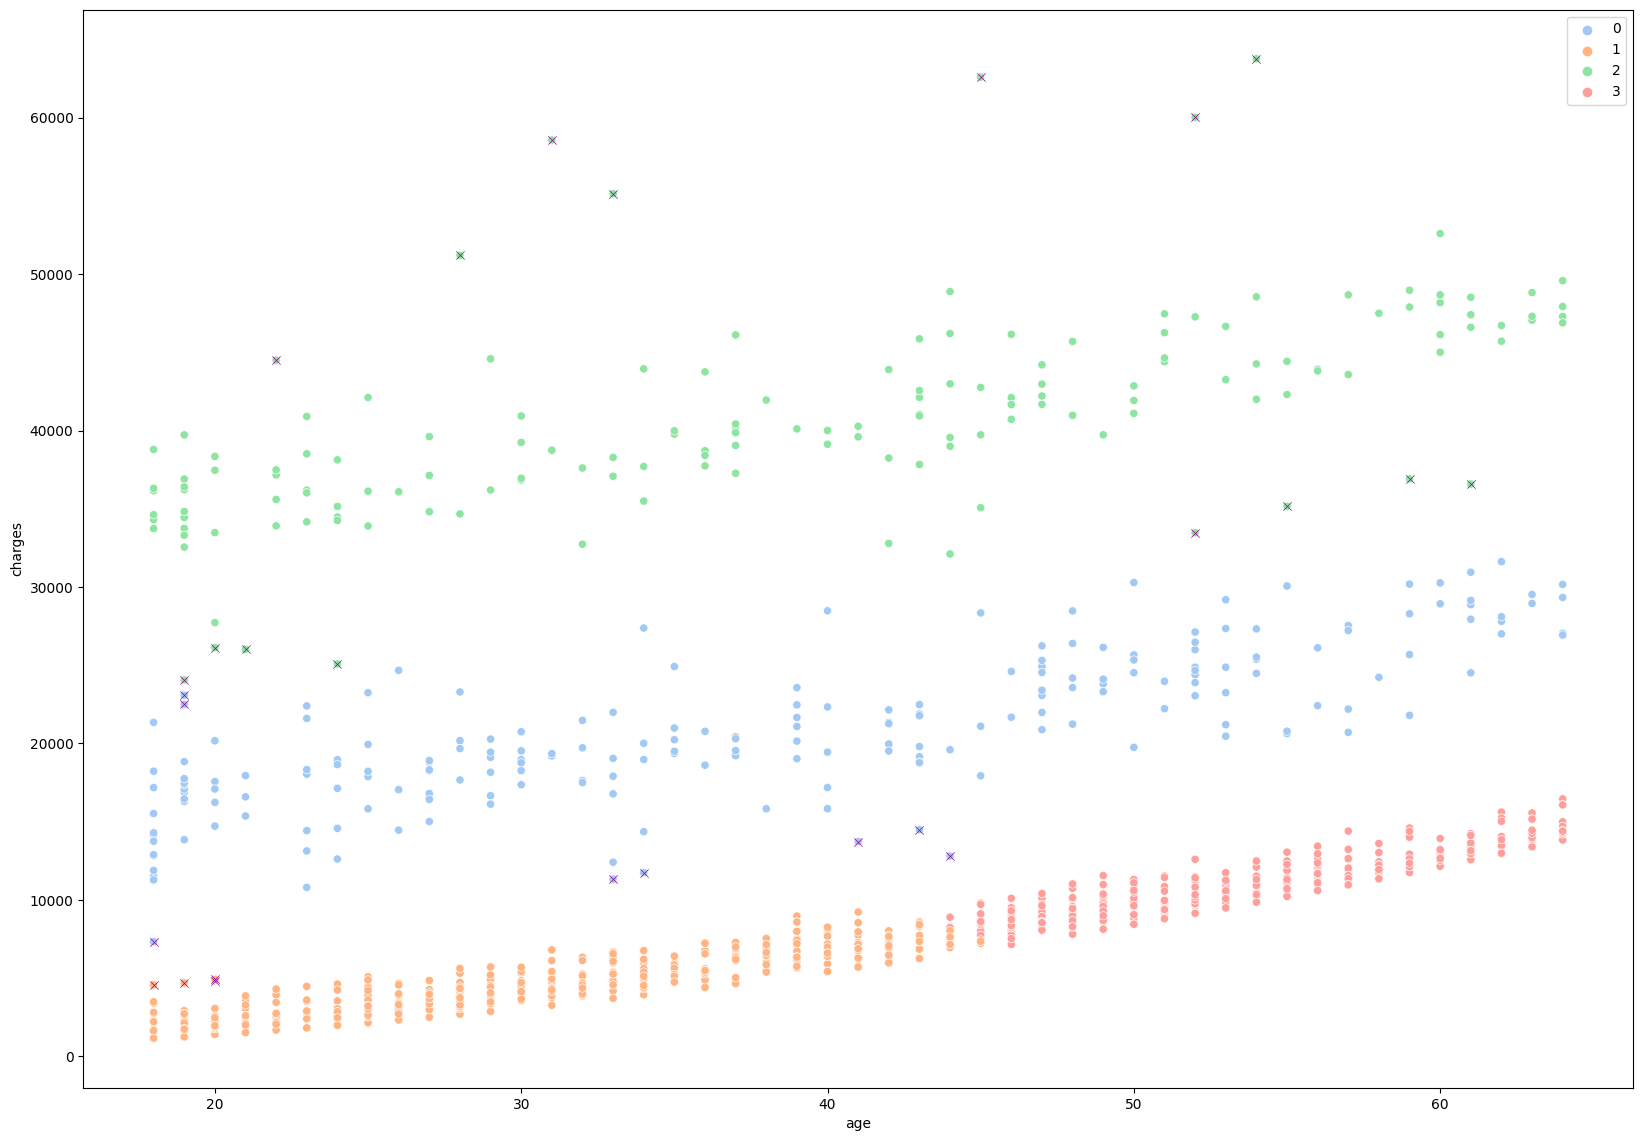

In [42]:
gm =GaussianMixture(n_components=4, covariance_type="full", random_state=11).fit(df_)
labels = gm.predict(df_)
plt.figure(figsize=(20,14))
sns.scatterplot(x = df_['age'],y = df_['charges'], hue=labels,palette="pastel")
sns.scatterplot(data=anomalies, x = anomalies['age'], y= anomalies['charges'], color='darkmagenta', marker='x')
plt.show()